In [22]:
import numpy as np
import torch as ch
import matplotlib.pyplot as plt
from tqdm import tqdm
from aicsimageio import AICSImage
from confocalQuant.segmentation import (
    show_im,
    load_2D,
    threshold_im,
    update_image,
    load_3D,
    apply_thresh_all_Z,
    do_inference,
    get_anisotropy,
    sigmoid,
    toggle_segmentation,
    extract_channels,
    show_maxproj_with_outlines,
    hide_masks,
    run_med_filter,
    gamma_correct_image,
    int_to_float,
    float_to_int
)
from confocalQuant.quantification import get_im_stats
from cellpose import models

### Prep the image

In [2]:
# specify channels to load
channels = [0,1,2] # channel order SREBPorTOMM20/NeuN/DAPI

# specify path
path = './data/10252023_Tomm20_matchedcohort/10290265con_4.czi'

# load image
img = AICSImage(path)
out = load_3D(img, channels)

# convert to float
out_float = int_to_float(out)

# run med filter to remove noise
out_med = run_med_filter(out_float, kernel_size = 3)

In [1]:
# perform gamma correction for visualization
dictionary = {0:(1,0,99.9), 1:(1,55,100), 2:(.4,0,100)}
out_med_gamma = gamma_correct_image(out_med, dictionary)

out_med_gamma_mean_proj = float_to_int(np.mean(out_med_gamma, axis=(1,2,3)))

plt.figure(figsize = (20,20))

plt.imshow(temp)

### Do inference

In [134]:
# get anisotropy
anisotropy = get_anisotropy(img)
print('Anisotropy: ' + str(anisotropy))

# load model
model = models.Cellpose(gpu = True, model_type='cyto2')

# run inference
masks, flows = do_inference(out_med, do_3D=True, model=model, anisotropy=anisotropy, diameter=20, channels=[2,3], channel_axis=3, z_axis=0, min_size=1100, normalize = False)
masks, flows, styles, _ = model.eval(out_med, do_3D=True, anisotropy=anisotropy, diameter=20, channels=[2,3], channel_axis=3, z_axis=0, min_size=1100, normalize = False)#1100, 20

2.4088670663621183


### Toggle through segmentation

In [206]:
out_vis = extract_channels([1],[0,1,2], out_med)

out_vis[:,:,:,0] = gamma_correct(out_vis[:,:,:,0],1, 0,100)
out_vis[:,:,:,1] = gamma_correct(out_vis[:,:,:,1],1, 95, 99.5)
out_vis[:,:,:,2] = gamma_correct(out_vis[:,:,:,2],1, 55,100)

/state/partition1/slurm_tmp/24324465.0.0/ipykernel_1404157/1545501408.py:8: RuntimeWarning: invalid value encountered in divide
  image_float = np.clip((image_float-lower)/(upper-lower), a_min = 0, a_max = 1)


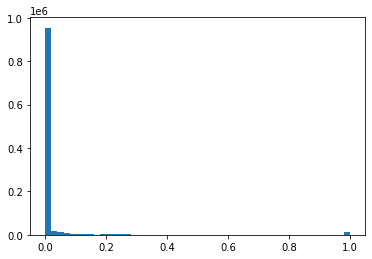

In [207]:
plt.hist(out_vis[16,:,:,1].ravel(), 50)
None

In [208]:
out_med_uint = (out_vis*255).astype('uint8')

/state/partition1/slurm_tmp/24324465.0.0/ipykernel_1404157/2218458842.py:1: RuntimeWarning: invalid value encountered in cast
  out_med_uint = (out_vis*255).astype('uint8')


In [209]:
toggle_segmentation(out_med_uint, masks)
# using notebook from above

100%|██████████| 37/37 [00:01<00:00, 19.53it/s]


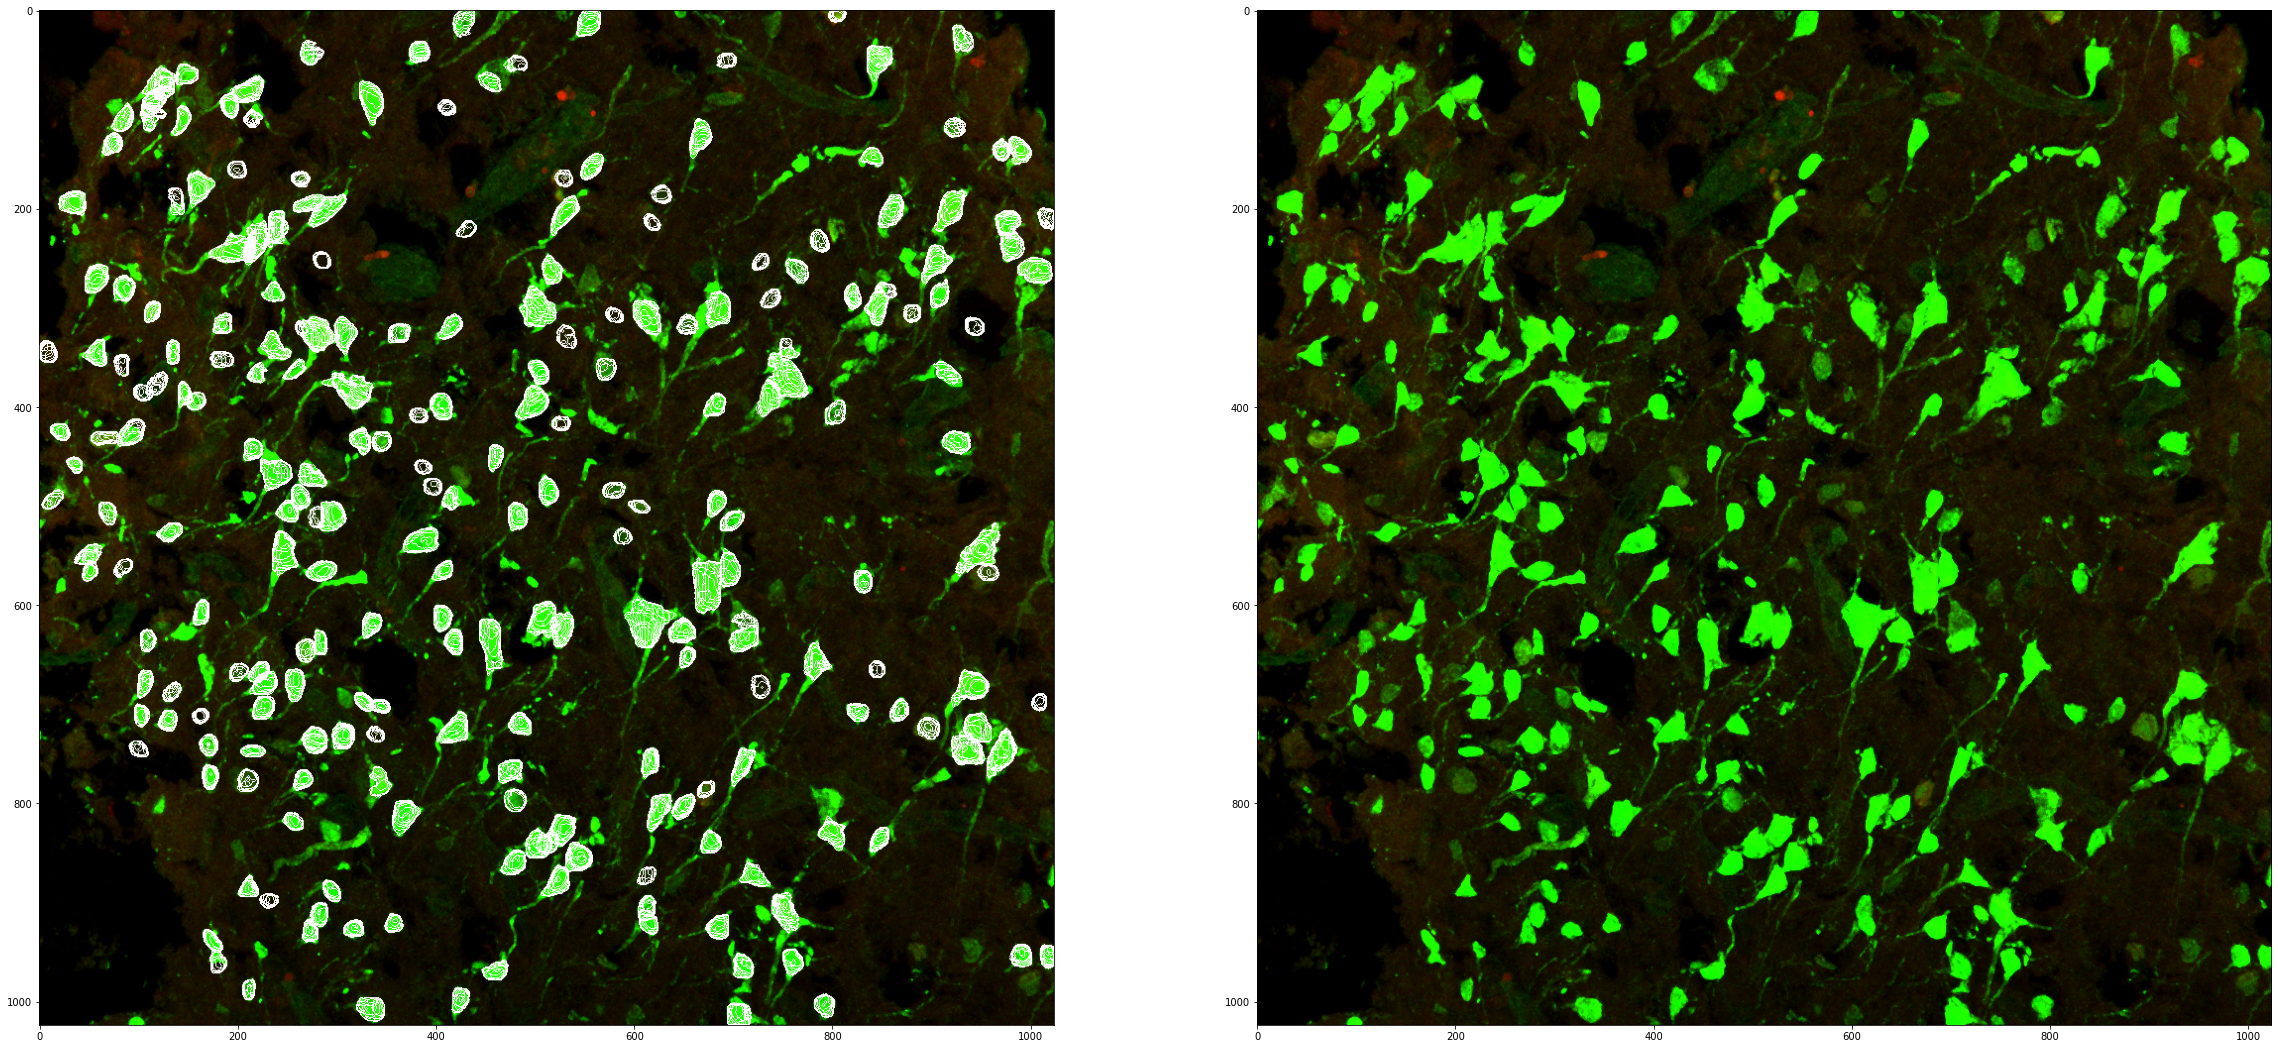

In [177]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(40, 40))  # Adjust figsize as needed


# Plot data on the first subplot (axs[0])
axs[0].imshow(show_maxproj_with_outlines(out_med_uint, masks))#[5:20]

masks_temp = masks.copy()
masks_temp[masks_temp>0]=0

axs[1].imshow(show_maxproj_with_outlines(out_med_uint, masks_temp))

In [ ]:
# subtract background from green channel (x percent) before running model to remove the halucinations due to background
# Do that same subtraction for the channel of interest that we care about (ie. to remove background)
# Don't show max projection, but mean projection

100%|██████████| 37/37 [00:02<00:00, 17.07it/s]


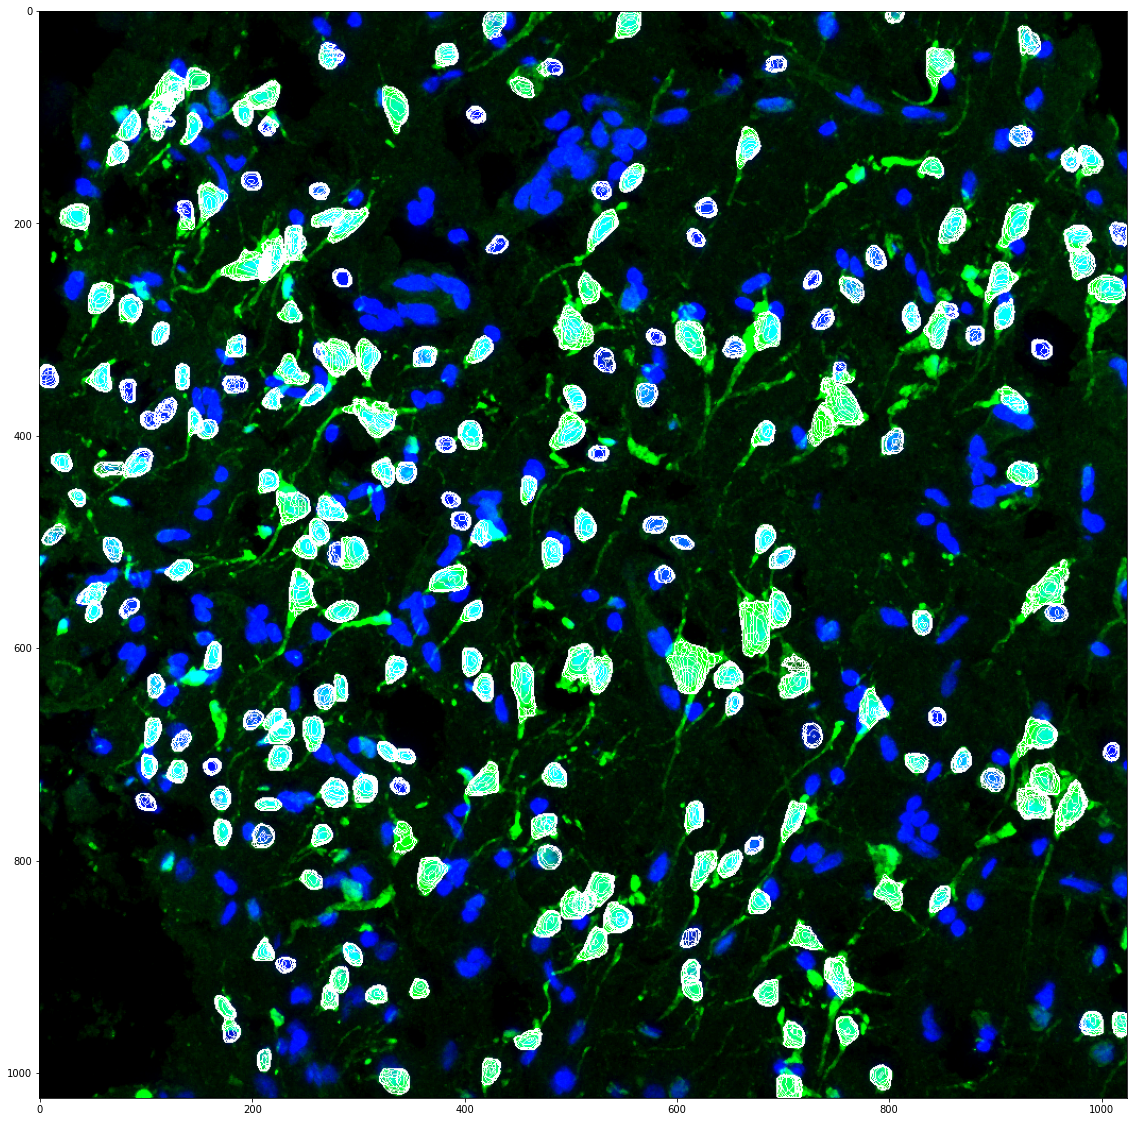

In [139]:
plt.figure(figsize = (20,20))

show_maxproj_with_outlines(out_med_uint, masks)#[5:20])

In [126]:
(200*0.417)/9

9.266666666666666

100%|██████████| 37/37 [00:01<00:00, 19.62it/s]


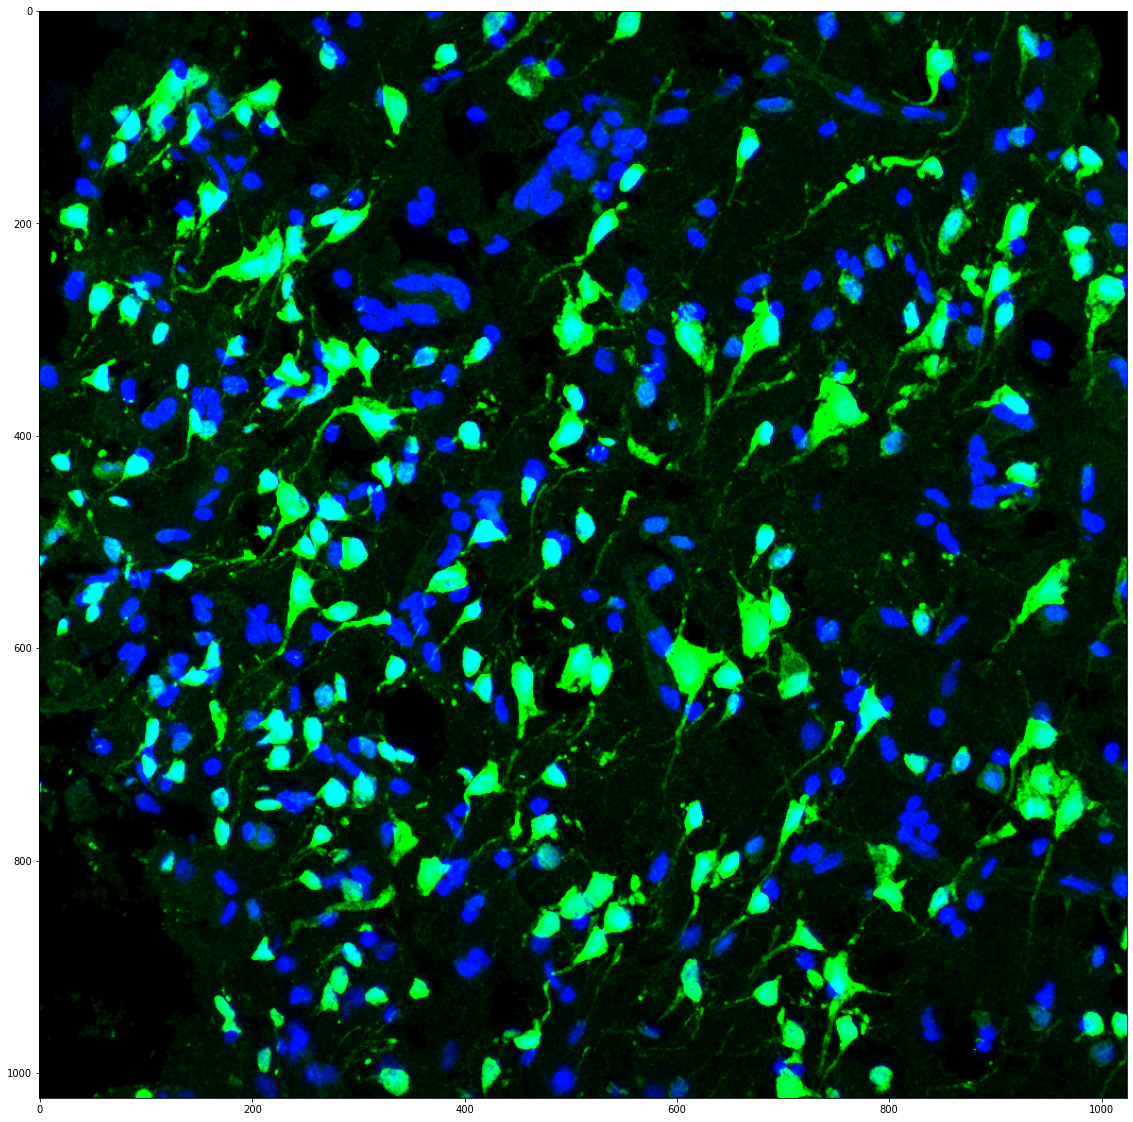

In [138]:
plt.figure(figsize = (20,20))


In [694]:
# filter out low NeUn

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [681]:
masks[masks>0]=0

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Get image stats

In [74]:
# get the image stats
Y = get_im_stats(masks, mat2, probs)

100%|██████████| 153/153 [01:23<00:00,  1.83it/s]


### Explore filtering params

In [79]:
dictionary

{0: 0, 1: 99.96838280643931, 2: 15.733808083293999, 3: 1477.8}

In [80]:
C2 = np.percentile(Y[:,2], 10, axis=(0))
C1 = np.percentile(Y[:,1], 10, axis=(0))
V = np.percentile(Y[:,3], 15, axis=(0))

dictionary2 = dict(zip(range(4), [0, C1, C2, V]))

In [81]:
dictionary2

{0: 0, 1: 81.95396380009096, 2: 48.994601322835116, 3: 1605.4}

In [93]:
# filter based on channels

masks_copy = masks.copy()

# C2 = np.percentile(Y[:,2], 10, axis=(0))
# C1 = np.percentile(Y[:,1], 10, axis=(0))
# V = np.percentile(Y[:,3], 15, axis=(0))

# dictionary = dict(zip(range(4), [0, C1, C2, V]))
hide_masks(Y, masks_copy, dictionary)

mat2 = extract_channels([1,2], channels, mat)

toggle_segmentation(mat2, masks_copy)

### 2D projections

In [49]:
from main import get_czi_files

In [51]:
len(get_czi_files('./data/10252023_SREBP2_matchedcohort/'))

84

In [98]:
40*84

3360

In [97]:
len(np.unique(masks_copy))

110

In [ ]:
# will need to check how much the channel intensity for the channel we care about differs by image (ie if we need some kind of background subtraction)
# make pipeline runable on all images at once; so that Y_filtered gets concatenated - labeled by image - and then can look up the condition from the temp file

In [ ]:
# then have Colin repeat this blinded to results